<a href="https://colab.research.google.com/github/lobotomy10/casino_project/blob/main/CasinoBJ_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Takumi Mori
*   Sep 26, 2022
*   Simulation for BJ








ブラックジャックはカジノでも負けにくいと言われている。<br>
ブラックジャックの戦略として、Basic Strategyと、カウンティングを用いて行なうPerfect Strategyがある。<br>
カウンティングは基本的に禁止されているので、今回はBasic Strategyに基づいてプレーした際のシミュレーションをプログラムし可視化する。

**BSに完璧に基づいてプレイした場合の最適なやめどきと、プレイ回数、確率について探求する。**
<br><br>
開発手順は以下にして行なう
1. デッキ山を作成
2. dealerのopen_cardに基づいた、playerのacitonを作成
3. dealerのactionを作成
4. dealer_action, player_actionから持ち金の変動と回数をlist形式で代入していく
5. 可視化を行なう




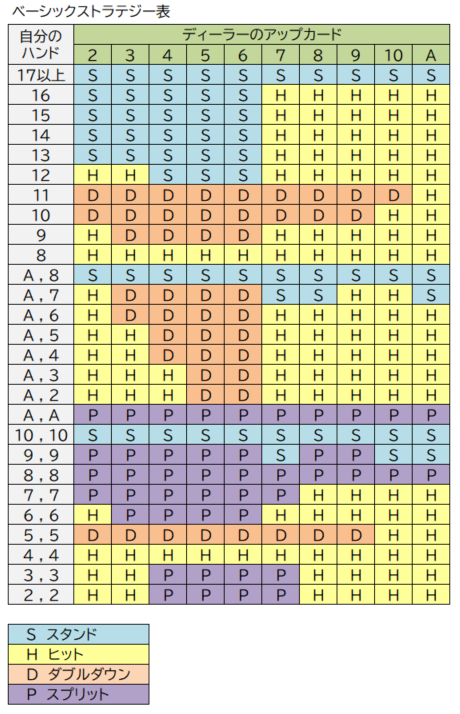

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import random as rd

rd.seed(10)

### デッキ山作成プログラム
変数のデッキ数だが、Vegasのカジノでは通常8デッキが用いられる。<br>
ここでは、deck_numを変数としてシャッフルされたデッキ山をlistで作成する
BJでは、J, Q, K　は10以外で扱わないのでlistにそのまま10として代入した2ndを使用。
'A' 1or11として扱うが初期として11と代入する。


In [ ]:
# cards_deck = 4*['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K'] # a cards deck
# deck_num = 8 # def deck num
# full_decks = cards_deck * deck_num # number of cards deck
# rd.shuffle(full_decks) 

In [ ]:
cards_deck = 4*[11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10] # a cards deck A 
deck_num = 8 # def deck num
full_decks = cards_deck * deck_num # number of cards deck
rd.shuffle(full_decks) 

### ブラックジャックのゲームの定義

dealerとplayerが引き回数を変数timesとして行なう。


今回はBSのシミュレーションを行なう為、持ち金が０になるまで処理を繰り返す。 

player's action is changing as dealer's open_hand, so 


開発手順は以下にして行なう
1. 適当なデッキ数を作成
2. 初期手札を配る
3. Playerのactionを定義
4. Dealerのactionを定義
5. Gameの作成

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import random as rd
rd.seed(10)


def shuffled_deck(): # make shuffled deck 
  global full_decks
  cards_deck = 4*[11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10] # a cards deck A 
  deck_num = 8 # def deck num
  full_decks = cards_deck * deck_num # number of cards deck
  rd.shuffle(full_decks) 
  return full_decks


def first_hand(): # first hand for player and dealer 
  global dealer_hand, player_hand
  dealer_hand = [] # reset the dealer hand
  player_hand = [] # reset the player_hand 
  dealer_hand = full_decks[0:2] # dealer hand 
  del full_decks[0:2]
  player_hand = full_decks[0:2] # player hand
  del full_decks[0:2]
  print("Dealer's open card: {} \nPlayer's cards: {}".format(dealer_hand[0], player_hand))

def players_action(player_hand): 
  global player_final_hand
  print(player_hand)
  if 11 in player_hand and 10 in player_hand: # BJ
    player_final_hand = player_hand
  else:
    action = ''
    while action != 'S': # while to become to True
      if sum(player_hand) > 21:
        break
      else: 
        action = input("H: Hit, S: Stand, D: Doubledown　:")
        if action == 'H':
          player_hand.append(full_decks[0]) # draw card from deck
          del full_decks[0] # del a card from deck
          if sum(player_hand) > 21 and 11 in player_hand: 
            player_hand[player_hand.index(11)] = 1
          print(player_hand)
        elif action == 'D':
          player_hand.append(full_decks[0]) # draw card from deck
          del full_decks[0] # del a card from deck
          if sum(player_hand) > 21 and 11 in player_hand: 
            player_hand[player_hand.index(11)] = 1
          break
        else: 
          break
    player_final_hand = player_hand
  return player_final_hand

        
def dealers_action(dealer_hand): # 0 < x < 17 draw, 17 <= x <= 21 stand, x > 22 Burst
  global dealer_final_hand
  print("Dealer's hand: ", dealer_hand)
  while sum(dealer_hand) < 17:
    dealer_hand.append(full_decks[0]) # draw card from deck
    del full_decks[0] # del a card from deck
    if sum(dealer_hand) > 21 and 11 in dealer_hand: 
          dealer_hand[dealer_hand.index(11)] = 1
    print("Dealer's hand: ", dealer_hand)
  dealer_final_hand = dealer_hand
  return dealer_final_hand

  
def play_result(player_final_hand, dealer_final_hand):
  global result
  if sum(player_final_hand) > 21:
    result  = 'lost'
  elif sum(player_final_hand) == sum(dealer_final_hand):
    result = 'draw'
  elif player_final_hand == [10, 11] or player_final_hand == [11, 10]:
    result = 'BJ_win'
  elif sum(player_final_hand) > sum(dealer_final_hand):
    result = 'win'
  elif sum(dealer_final_hand) > 21: 
    result = 'win'
  else:
    result = 'lost'
  print(result)

In [44]:
shuffled_deck() 
x = ''
while x != 'yes':
  first_hand()
  players_action(player_hand)
  dealers_action(dealer_hand)
  play_result(player_final_hand, dealer_final_hand)
  x = input('Do you wanna quit this game?(yes or no): ')

Dealer's open card: 10 
Player's cards: [2, 4]
[2, 4]
H: Hit, S: Stand, D: Doubledown　:H
[2, 4, 10]
H: Hit, S: Stand, D: Doubledown　:S
Dealer's hand:  [10, 5]
Dealer's hand:  [10, 5, 10]
win
Do you wanna quit this game?(yes or no): yes
